In [23]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [18]:
df.tail(5)

,,,,,,,,,,,,,Bejaia Region Dataset
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [19]:
print("Rows 120 to 125 (Look for the mess):")
display(df.iloc[120:125])

Rows 120 to 125 (Look for the mess):


,,,,,,,,,,,,,Bejaia Region Dataset
28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [28]:
#CLEAN COLUMN NAMES IMMEDIATELY
df.columns = df.columns.str.strip() 

#ADD REGIONS
#First 122 rows = Region 0, Rest = Region 1
df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1
df[['Region']] = df[['Region']].astype(int)

#DROP EMPTY ROWS
df = df.dropna().reset_index(drop=True)

#REMOVE THE REPEATED HEADER ROW
df = df[df['day'] != 'day']

#FIX CLASSES COLUMN
df['Classes'] = df['Classes'].str.strip()

#CHANGE DATA TYPES (Object -> Numbers)
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

print("Shape:", df.shape)
display(df.head())

Shape: (243, 15)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


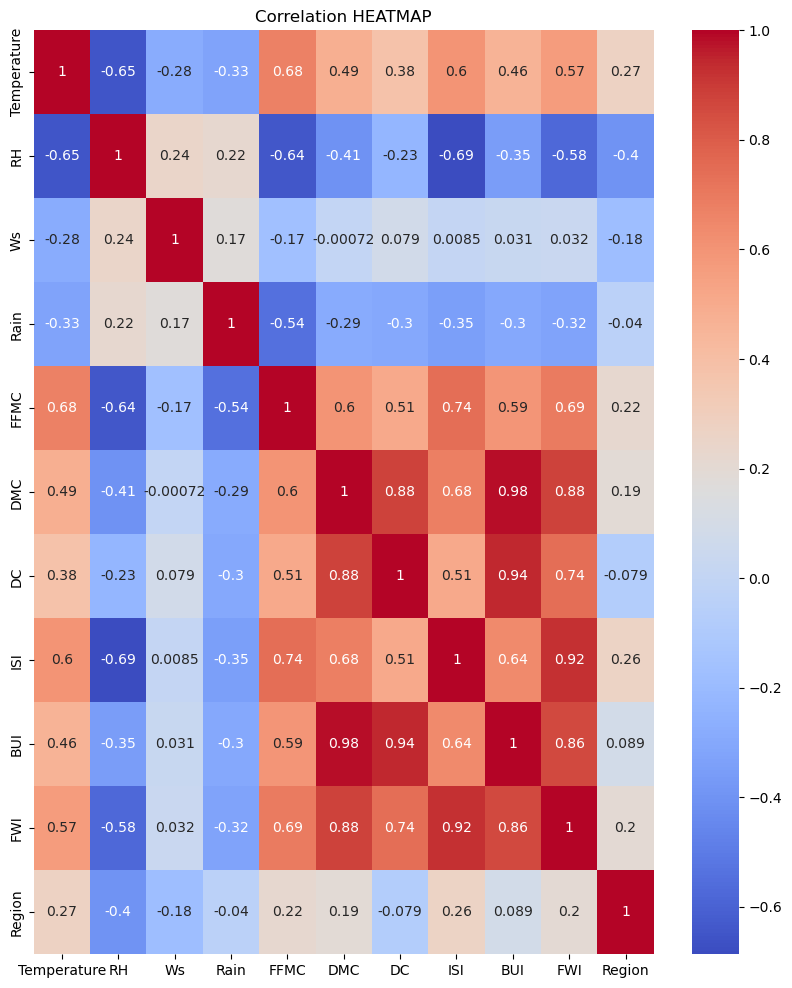

In [29]:
#dropping the date as they dont predict the fire well

df_dup = df.drop(['day','month','year','Classes'], axis=1)

#correlation Heatmap 
plt.figure(figsize=(10,12))
sns.heatmap(df_dup.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation HEATMAP")
plt.show()

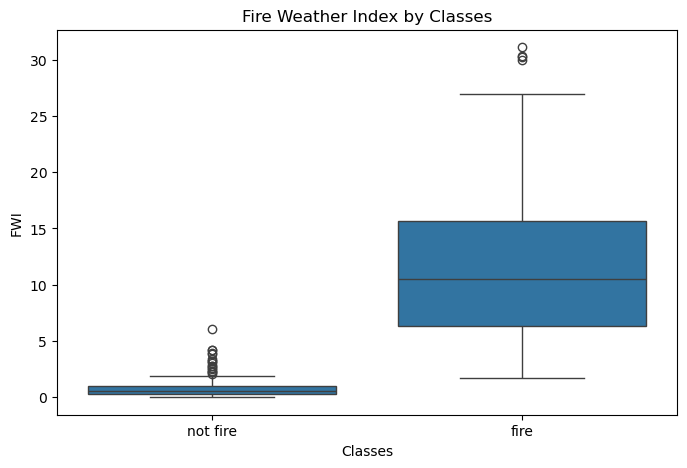

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Classes', y='FWI', data=df)
plt.title('Fire Weather Index by Classes')
plt.show()

In [32]:
#encoding Classes 
df['Classes'] = df['Classes'].map({'not fire': 0, 'fire': 1})

In [33]:
#Dropping date and FWI bcz we want to predit FWI 
X = df.drop(['day', 'month', 'year', 'FWI'], axis=1)

y = df['FWI']

print("Feature shape (X):", X.shape)
print("Target shape (y):", y.shape)
print("\nFirst 5 rows of Features (X):")
display(X.head())

Feature shape (X): (243, 11)
Target shape (y): (243,)

First 5 rows of Features (X):


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [34]:
#tarin and test splitting and strandardization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler() 

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# 4. Check the result
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

#The mean should be effectively 0, and std dev should be 1
print("\nMean of First Column (approx 0):", np.mean(X_train_scaled[:, 0]))
print("Std Dev of First Column (approx 1):", np.std(X_train_scaled[:, 0]))

X_train_scaled shape: (182, 11)
X_test_scaled shape: (61, 11)

Mean of First Column (approx 0): 5.953723472715125e-16
Std Dev of First Column (approx 1): 1.0


'''Model Training'''

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score

#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

print("Linear Regression R2:", r2_score(y_test, y_pred_lin))
print("Linear Regression Mae:", mean_absolute_error(y_test, y_pred_lin))

Linear Regression R2: 0.98938502949221
Linear Regression Mae: 0.4654460800094099


In [39]:
#lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("\nLasso Regression R2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MAE:", mean_absolute_error(y_test, y_pred_lasso))


Lasso Regression R2: 0.984177196741951
Lasso Regression MAE: 0.606624443830203


In [40]:
#ridge regression 
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("\nRidge Regression R2:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression MAE:", mean_absolute_error(y_test, y_pred_ridge))


Ridge Regression R2: 0.9871729594175266
Ridge Regression MAE: 0.5032856973416846


In [42]:
import pickle

pickle.dump(scaler, open('models/scaler.pkl', 'wb'))

pickle.dump(ridge, open('models/ridge.pkl', 'wb'))

pickle.dump(lasso, open('models/lasso.pkl', 'wb'))